# **Employee Salaries Exercise**

### **Load Necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** Read Salaries.csv as a dataframe called sal.**

In [6]:
# for jupyter
#sal = pd.read_csv('Salaries.csv')

# for colab
sal = pd.read_csv('Salaries.csv')

In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [7]:
# change JobTitle data type to category
sal.JobTitle = sal.JobTitle.astype('category')

In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  int64   
 1   EmployeeName      148654 non-null  object  
 2   JobTitle          148654 non-null  category
 3   BasePay           148045 non-null  float64 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  int64   
 10  Notes             0 non-null       float64 
 11  Agency            148654 non-null  object  
 12  Status            0 non-null       float64 
dtypes: category(1), float64(8), int64(2), object(2)
memory usage: 14.0+ MB


In [9]:
sal.JobTitle

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: category
Categories (2159, object): ['ACCOUNT CLERK', 'ACCOUNTANT', 'ACCOUNTANT INTERN',
                            'ACPO,JuvP, Juv Prob (SFERS)', ..., 'X-Ray Laboratory Aide',
                            'YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS', 'Youth Comm Advisor', 'ZOO CURATOR']

In [10]:
# reduce bit size
sal.BasePay = sal.BasePay.astype('float32')

In [11]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  int64   
 1   EmployeeName      148654 non-null  object  
 2   JobTitle          148654 non-null  category
 3   BasePay           148045 non-null  float32 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  int64   
 10  Notes             0 non-null       float64 
 11  Agency            148654 non-null  object  
 12  Status            0 non-null       float64 
dtypes: category(1), float32(1), float64(7), int64(2), object(2)
memory usage: 13.4+ MB


# ** Check the head of the DataFrame. **

In [18]:
#sal.head(3)

#sal.isna().sum()
sal[50000:]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
50000,50001,Ronald Mitchell,Transit Operator,60127.531250,22858.37,981.18,35218.62,83967.08,119185.70,2012,NaN,San Francisco,NaN
50001,50002,Christopher Miller,Automotive Machinist,74883.921875,9554.27,1378.04,33367.46,85816.23,119183.69,2012,NaN,San Francisco,NaN
50002,50003,Michael Brown,IS Administrator 2,80171.000000,0.00,3948.94,35058.59,84119.94,119178.53,2012,NaN,San Francisco,NaN
50003,50004,Gina Gendotti,Administrative Analyst,81541.281250,0.00,2172.16,35464.47,83713.44,119177.91,2012,NaN,San Francisco,NaN
50004,50005,William Taylor,Transit Operator,63675.800781,16830.09,1473.21,37191.88,81979.10,119170.98,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.000000,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [19]:
# Check nan values
sal.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [20]:
#total records , rows and columns
print('Total number of rows:',sal.shape[0])
print('Total number of columns:',sal.shape[1])

Total number of rows: 148654
Total number of columns: 13


In [21]:
#check feature names
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [23]:
#drop Notes ,'Agency' and Status columns bcz they have 100% missing values
sal.drop(columns=['Id','Notes','Status','Agency'],inplace=True)

In [24]:
#check new shape
print('Total number of columns after deletiion :',sal.shape[1])

Total number of columns after deletiion : 9


In [25]:
#check columns
sal.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [26]:
# keep one copy of dataframe to rollback
sal_copy = sal.copy()

In [27]:
sal.isna().sum()

EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [30]:
#fill BasePay NaN by using some technique
#sal.BasePay.isna().sum()
sal.BasePay.describe()

count    148045.000000
mean      66325.445312
std       42764.636719
min        -166.009995
25%       33588.199219
50%       65007.449219
75%       94691.046875
max      319275.000000
Name: BasePay, dtype: float64

In [34]:
# how many employees getting -ve basepay
sal.query('BasePay<=0').shape[0]

1309

In [38]:
# fetch index of above employee
sal.query('BasePay<=0').index

Index([], dtype='int64')

In [35]:
sal.drop(index=sal.query('BasePay<=0').index,inplace=True)

In [36]:
sal.query('BasePay<=0').shape[0]

0

In [41]:
# fill missing values in BasePay using mean
# mean      66917.13
# calculate mean of BasePay
sal.BasePay.mean()

66917.13

In [42]:
sal.BasePay.fillna(66917,inplace=True)

In [43]:
sal.BasePay

0         167411.187500
1         155966.015625
2         212739.125000
3          77916.000000
4         134401.593750
              ...      
148620        15.500000
148646     66917.000000
148650     66917.000000
148651     66917.000000
148652     66917.000000
Name: BasePay, Length: 147345, dtype: float32

In [ ]:
# Assignmnet: Round the basePay

<Axes: >

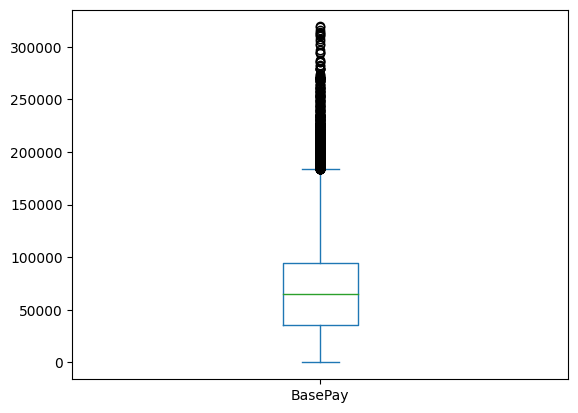

In [44]:
sal.BasePay.plot(kind='box')

In [ ]:
# fill NaN value in BasePay
sal.BasePay = sal.BasePay.fillna(66319.52)

In [ ]:
sal.BasePay.isna().sum()

In [ ]:
#check BasePay of Transit Operator
#sal[sal.JobTitle == 'Transit Operator']
#sal.groupby('JobTitle').get_group('Transit Operator')
sal.query('JobTitle == "Transit Operator"')

In [ ]:
#check duplicate rows
sal[sal.duplicated()]

we dont have duplicate records

In [ ]:
sal.isna().any()

# ** find out how many entries are there **

In [ ]:
#number of rows
sal.shape[0]

In [ ]:
len(sal)

In [ ]:
# No. records present in 2014
len(sal.query('Year==2014'))

#sal.query('Year==2014').shape[0]

In [ ]:
#lets check integrity of data
sal.query('Year==2014')['TotalPay'].plot(kind='box')

In [ ]:
sal.query('Year==2014')['TotalPay'].plot(kind='hist',bins=[0,100000,200000,300000])

In [ ]:
sal.query('Year==2014')['TotalPay'].nsmallest()

In [ ]:
# How many employee getting 0> total Pay
sum(sal.TotalPay <= 0)

In [ ]:
# display records of employee getting TotalPay <=0
sal.query('TotalPay<=0')

In [ ]:
# how many are there whose post is Not provided
sal.query('JobTitle=="Not provided"')

# **What is the average BasePay ?**

In [ ]:
sal['BasePay'].mean()

# ** What is the highest amount of OvertimePay in the dataset ? **

In [ ]:
sal.OvertimePay.max()

## Fetch record of Highest paid employee

In [ ]:
#sal.query('TotalPayBenefits==TotalPayBenefits.max()')
sal[sal.TotalPayBenefits == sal.TotalPayBenefits.max()]

In [ ]:
#Fetch name of highest Overtime pay employee
#sal.query('OvertimePay==OvertimePay.max()')['EmployeeName']
sal.query('OvertimePay==OvertimePay.max()').EmployeeName

# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [ ]:
sal.query('EmployeeName=="JOSEPH DRISCOLL"')

In [ ]:
#fetch both Joseph records lower and upper case
sal[sal['EmployeeName'].str.contains('joseph driscoll',case=False)]

In [ ]:
# Yearwise average TotalPay
#sal.query('Year==2014')['TotalPay'].mean()
sal.groupby('Year')['TotalPay'].mean()

# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [ ]:
sal.query('EmployeeName=="JOSEPH DRISCOLL"').TotalPayBenefits

In [ ]:
# I want mean, sum, std of TotalPay	TotalPayBenefits
sal[['TotalPay','TotalPayBenefits']].agg([np.mean,np.sum,np.std])

In [ ]:
# Create a new feature Bonus : condition is=Add 20% of BasePay into TotalPay
sal ['Bonus'] = sal.BasePay*.2 + sal.TotalPay

In [ ]:
sal.Bonus

In [ ]:
# Fetch CAPTAIN III (POLICE DEPARTMENT) whose TotalPay is> 400000
sal.query('JobTitle=="CAPTAIN III (POLICE DEPARTMENT)" & TotalPay>400000')

In [ ]:
# yearwise sum of BasePay and average basePay
sal.groupby('Year')['BasePay'].agg([np.sum,np.mean])

# ** What is the name, Job title of highest paid person (including benefits)?**

# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [ ]:
# Yearwise Average BasePay


# ** How many unique job titles are there? **

# ** What are the top 5 most common jobs? **

# How many are there those work as a POLICE OFFICER III

# In which department we have least employees?

# Fetch record of year 2011 where Basepay 200000

# How much average basepay is given to employees inthe year 2013

# Plot.the % distribustion of Yearwise TotalPay

# How many employees getting 0 overtimePay?